# Figure 1e

This notebook recreates the visualization shown in figure 1e in the reference article.

> Same t-SNE plot as (C) [t-SNE plot of the integrated scRNA-seq profiles of epithelial cells form 11 reduction mammoplasties.] but colored by cell clusters (with Suerat cluster resolution set to 0.015)

<div style="text-align: center;">
    <img src="images/figure-1e-reference.png" alt="Figure 1e from Reference Article" width="50%">
    <p style="font-size:90%; color:gray; text-align: center;"><em>Figure 1e from Reference Article</em></p>
</div>

## 0. Initializations

In [2]:
# -- imports --
from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [3]:
# -- dataset --
gse = GSE161529()
all_real, all_noise = gse.get_combined_epithilial_dataset(real_pca_kwargs={}, noise_pca_kwargs={}, hvg_post_stromal=True)

2025-08-11 19:07:17,973 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-08-11 19:07:18,071 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-08-11 19:07:18,232 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-08-11 19:07:18,291 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-08-11 19:07:18,473 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

## 1. "Real" cells

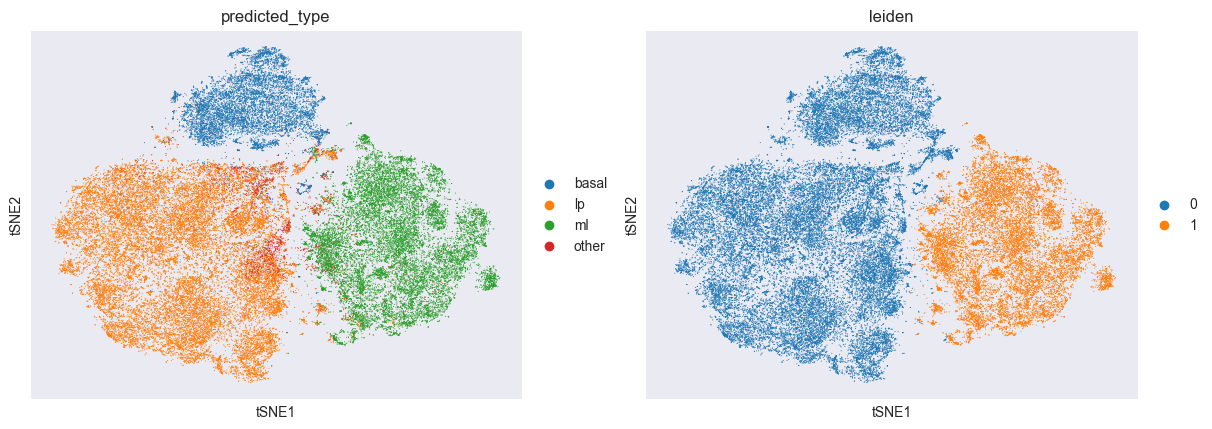

In [4]:
gse.visualize_tsne(all_real, color=['predicted_type', 'leiden'])

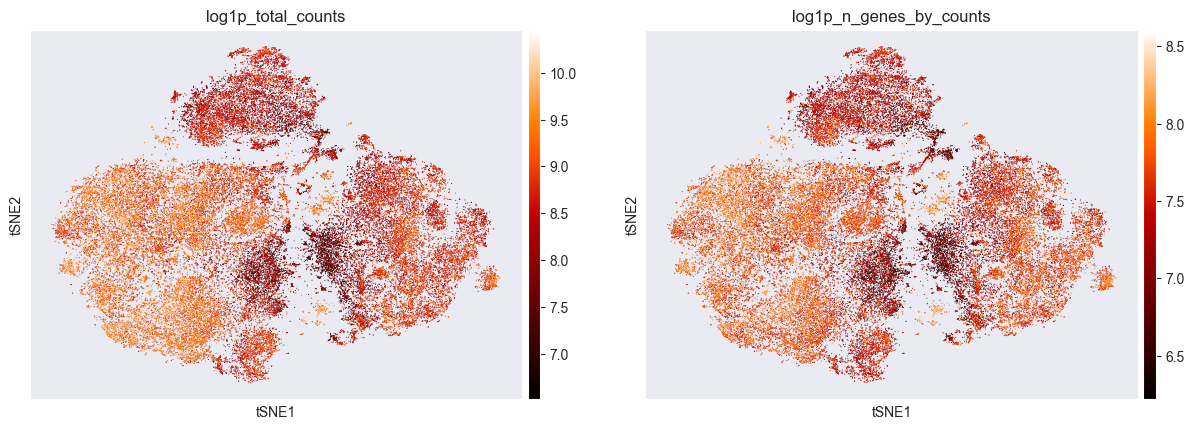

In [5]:
gse.visualize_tsne(all_real, color=['log1p_total_counts', 'log1p_n_genes_by_counts'], plot_kwargs={'cmap': 'gist_heat'})

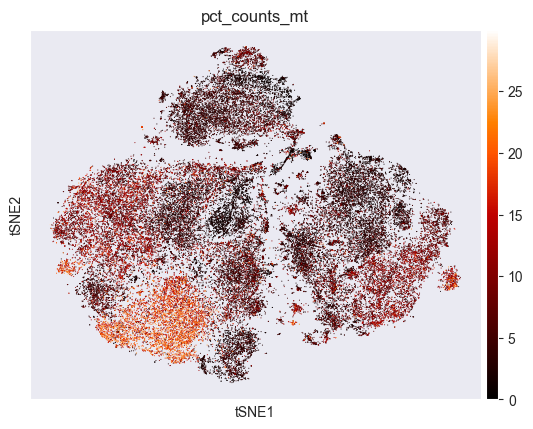

In [6]:
gse.visualize_tsne(all_real, color=['pct_counts_mt'], plot_kwargs={'cmap': 'gist_heat'})

## 2. "Noise" cells

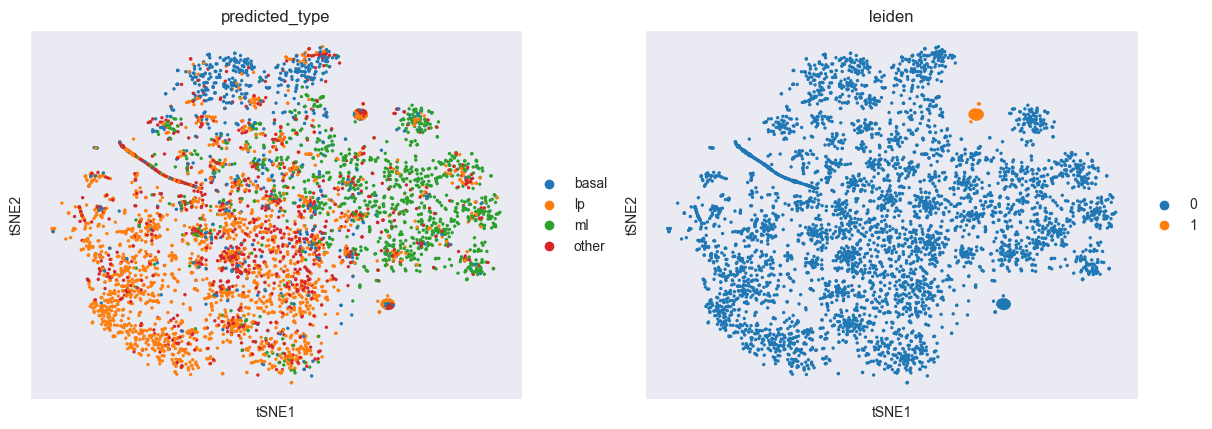

In [7]:
gse.visualize_tsne(all_noise, color=['predicted_type', 'leiden'])

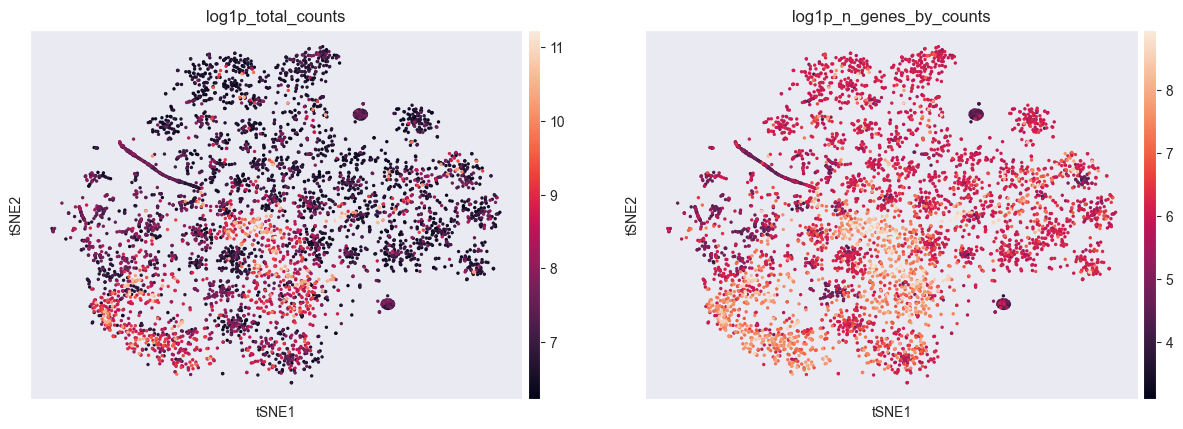

In [8]:
gse.visualize_tsne(all_noise, color=['log1p_total_counts', 'log1p_n_genes_by_counts'])

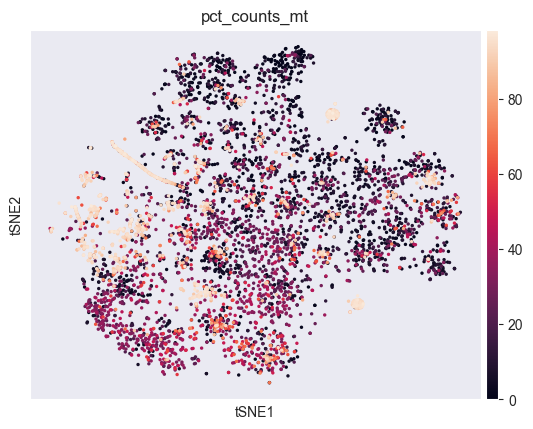

In [9]:
gse.visualize_tsne(all_noise, color=['pct_counts_mt'])

#### 2.a. Gather numbers for paper

In [46]:
mito_high = all_noise.obs['pct_counts_mt'].describe()['75%']
mito_mod = all_noise.obs['pct_counts_mt'].describe()['50%']
mito_lo = all_noise.obs['pct_counts_mt'].describe()['25%']
rna_high = all_noise.obs['log1p_total_counts'].describe()['75%']
rna_mod = all_noise.obs['log1p_total_counts'].describe()['50%']
rna_lo = all_noise.obs['log1p_total_counts'].describe()['25%']
gene_high = all_noise.obs['log1p_n_genes_by_counts'].describe()['75%']
gene_mod = all_noise.obs['log1p_n_genes_by_counts'].describe()['50%']
gene_lo = all_noise.obs['log1p_n_genes_by_counts'].describe()['25%']

mask_mito_high = all_noise.obs['pct_counts_mt'] >= mito_high
mask_genes_high = all_noise.obs['log1p_n_genes_by_counts'] >= gene_high

mask_mito_moderate = (all_noise.obs['pct_counts_mt'] > mito_lo) & (all_noise.obs['pct_counts_mt'] < mito_high)
mask_rna_moderate = (all_noise.obs['log1p_total_counts'] > rna_lo) & (all_noise.obs['log1p_total_counts'] < rna_high)
mask_genes_moderate = (all_noise.obs['log1p_n_genes_by_counts'] > gene_lo) & (all_noise.obs['log1p_n_genes_by_counts'] < gene_high)

mask_mito_low = all_noise.obs['pct_counts_mt'] <= mito_lo
mask_rna_low = all_noise.obs['log1p_total_counts'] <= rna_lo
mask_genes_low = all_noise.obs['log1p_n_genes_by_counts'] <= gene_lo

In [47]:
mask_damaged = mask_mito_high & mask_rna_low & mask_genes_low
mask_dormant = mask_mito_low & mask_rna_low & mask_genes_moderate
mask_multifunction = mask_mito_moderate & mask_rna_moderate & mask_genes_high

all_noise.obs['damaged'] = mask_damaged.astype(bool)
all_noise.obs['dormant'] = mask_dormant.astype(bool)
all_noise.obs['multifunction'] = mask_multifunction.astype(bool)

In [58]:
(all_noise.shape[0],
 all_noise.obs['damaged'].sum(),
 all_noise.obs['damaged'].sum()/all_noise.shape[0],
 all_noise.obs['dormant'].sum(),
 all_noise.obs['dormant'].sum()/all_noise.shape[0],
 all_noise.obs['multifunction'].sum(),
 all_noise.obs['multifunction'].sum()/all_noise.shape[0],
 )

(5014,
 np.int64(214),
 np.float64(0.04268049461507778),
 np.int64(539),
 np.float64(0.10749900279218189),
 np.int64(115),
 np.float64(0.022935779816513763))

In [55]:
all_noise.obs[all_noise.obs['damaged'] == 1][['is_low_num_genes', 'is_high_num_genes', 'is_high_mito', 'is_high_total_count']].describe().loc['max', :]

is_low_num_genes       1.0
is_high_num_genes      0.0
is_high_mito           1.0
is_high_total_count    0.0
Name: max, dtype: float64

In [56]:
all_noise.obs[all_noise.obs['dormant'] == 1][['is_low_num_genes', 'is_high_num_genes', 'is_high_mito', 'is_high_total_count']].describe().loc['max', :]

is_low_num_genes       1.0
is_high_num_genes      0.0
is_high_mito           0.0
is_high_total_count    0.0
Name: max, dtype: float64

In [57]:
all_noise.obs[all_noise.obs['multifunction'] == 1][['is_low_num_genes', 'is_high_num_genes', 'is_high_mito', 'is_high_total_count']].describe().loc['max', :]

is_low_num_genes       0.0
is_high_num_genes      0.0
is_high_mito           1.0
is_high_total_count    0.0
Name: max, dtype: float64

### 3. UMAPs

In [11]:
import scanpy as sc
sc.tl.umap(all_noise)
sc.tl.umap(all_real)

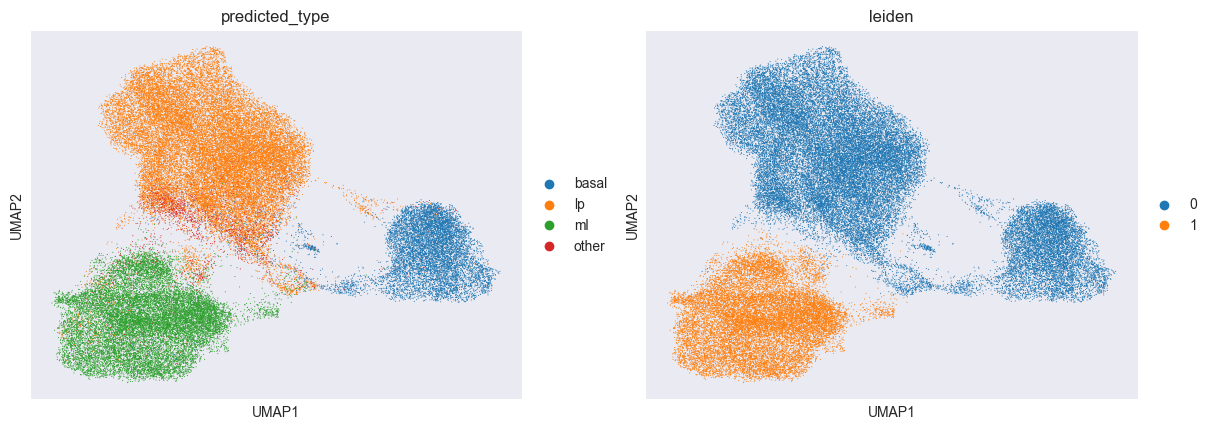

In [12]:
sc.pl.umap(all_real, color=['predicted_type', 'leiden'])

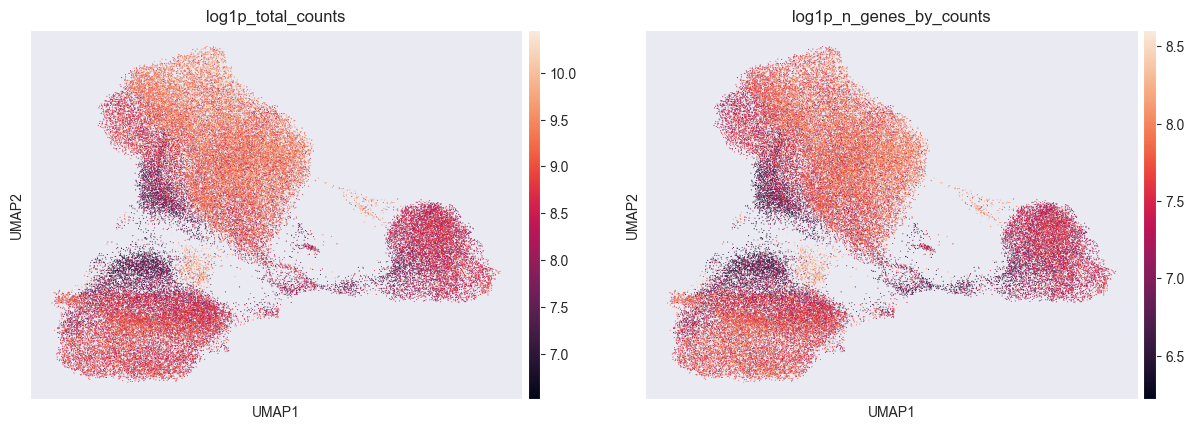

In [13]:
sc.pl.umap(all_real, color=['log1p_total_counts', 'log1p_n_genes_by_counts'])

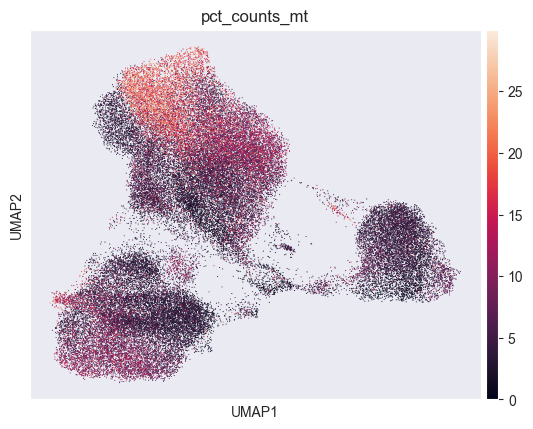

In [14]:
sc.pl.umap(all_real, color=['pct_counts_mt'])

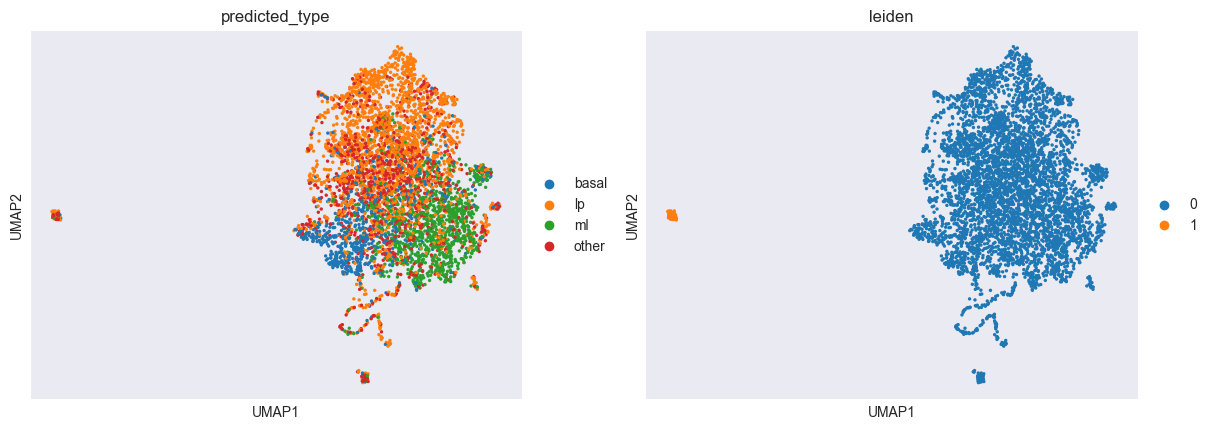

In [15]:
sc.pl.umap(all_noise, color=['predicted_type', 'leiden'])

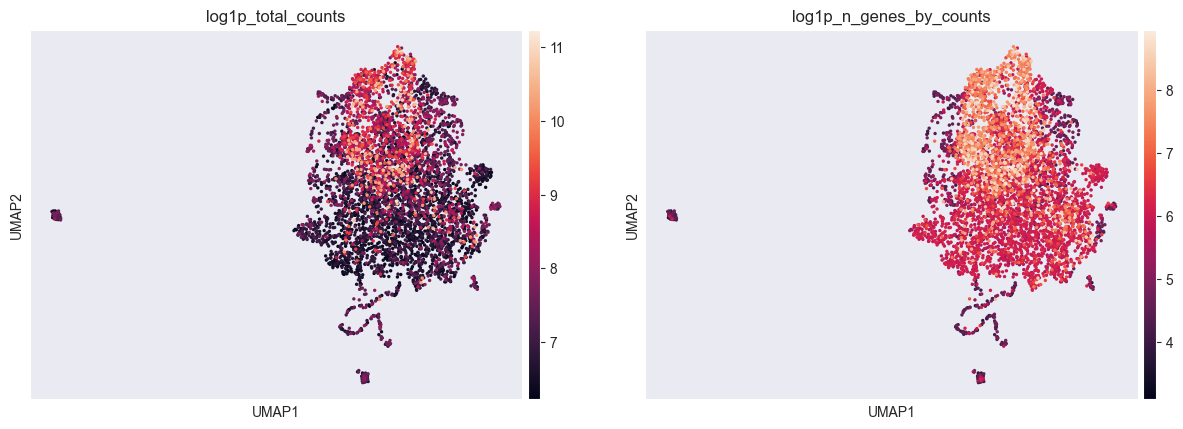

In [16]:
sc.pl.umap(all_noise, color=['log1p_total_counts', 'log1p_n_genes_by_counts'])

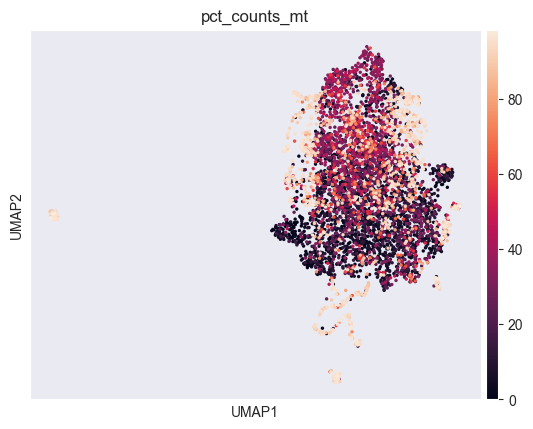

In [17]:
sc.pl.umap(all_noise, color=['pct_counts_mt'])